# Suche nach der am besten geeigneten Verteilung

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
import copulas
from copulas.multivariate import  GaussianMultivariate
from scipy.stats import rv_continuous, rv_histogram, norm, beta, multivariate_normal, t,rv_discrete
from scipy import stats
import pert
import scipy

In [2]:
N=150000

In [3]:
distr_list=['norm','expon','pareto','t','gamma','lognorm','beta','loggamma','exponnorm','pearson3','alpha',
           'burr','betaprime','chi','chi2']

# Preis

In [4]:
preis=np.array([230,220,210,200,190,180])
prob_preis=np.array([0.05,0.125,0.225,0.3,0.225,0.075])

In [5]:
custm = stats.rv_discrete(name='custm', values=(preis, prob_preis))

In [6]:
sampl_dat=custm.rvs(size=N)

In [7]:
mle=[]
for i in distr_list:
    dist = getattr(scipy.stats, i) # Rücknahme Name des Verteilung (Class Attribute)
    arg = dist.fit(sampl_dat) # Berechnung der Verteilungsargumente bei Verwendung einer diskreten Verteilung
    new_distr=dist(*arg) # Erstellen einer Verteilungsklasse 
    data_synthetic = new_distr.rvs(size=N) # Stichproben aus einer Verteilung   
    mle.append(dist.nnlf(arg, sampl_dat)) # Berechnung der Werte der Log-Likelihood-Funktion
sse_df=pd.DataFrame({"Distribution": distr_list,
                    "MLE": mle,}) # Erstellen einer Tabelle mit Verteilungen und entsprechenden Werten der Log-Likelihood-Funktion  

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:809: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:813: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


In [8]:
sse_df.sort_values(by=['MLE'],ascending=True)

,Distribution,MLE
6,beta,560838.388399
13,chi,592982.270237
4,gamma,594224.540221
9,pearson3,594224.540221
10,alpha,594519.270509
12,betaprime,594670.228187
8,exponnorm,595416.624732
0,norm,595589.416151
3,t,595592.659746
7,loggamma,595785.227520


In [9]:
from distfit import distfit

In [10]:
dist = distfit(stats='RSS',distr=distr_list)   

In [11]:
dist.fit_transform(sampl_dat) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.192987] [loc=202.510 scale=12.828]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.19908] [loc=180.000 scale=22.510]
[distfit] >[pareto   ] [2.61 sec] [RSS: 0.20017] [loc=-0.541 scale=180.541]
[distfit] >[t        ] [2.77 sec] [RSS: 0.192987] [loc=202.510 scale=12.827]
[distfit] >[gamma    ] [1.78 sec] [RSS: 0.192895] [loc=143.564 scale=2.832]
[distfit] >[lognorm  ] [6.22 sec] [RSS: 0.209168] [loc=180.000 scale=0.161]
[distfit] >[beta     ] [4.60 sec] [RSS: 0.193962] [loc=180.000 scale=51.900]
[distfit] >[loggamma ] [2.13 sec] [RSS: 0.192972] [loc=-2968.712 scale=447.693]
[distfit] >[exponnorm] [1.49 sec] [RSS: 0.192957] [loc=197.255 scale=11.728]
[distfit] >[pearson3 ] [3.04 sec] [RSS: 0.192895] [loc=202.510 scale=12.920]
[distfit] >[alpha    ] [3.01 sec] [RSS: 0.192899] [loc=-15.445 scale=3716.750]
[distfit] >[burr     ] [15.6 sec] [RSS: 0.193601] [loc=-0.910 scale=155.943]
[distfit] >[betaprime] [4.11 sec] [

{'model': {'distr': <scipy.stats._continuous_distns.pearson3_gen at 0x26d29306fa0>,
  'stats': 'RSS',
  'params': (0.4383631992224467, 202.51002468660408, 12.91987824922752),
  'name': 'pearson3',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x26d2b5a0c10>,
  'score': 0.19289455065456493,
  'loc': 202.51002468660408,
  'scale': 12.91987824922752,
  'arg': (0.4383631992224467,),
  'CII_min_alpha': 182.98573039448186,
  'CII_max_alpha': 225.24562681984818},
 'summary':         distr     score  LLE          loc        scale  \
 0    pearson3  0.192895  NaN   202.510025    12.919878   
 1       gamma  0.192895  NaN   143.564023     2.831792   
 2   betaprime  0.192898  NaN    -4.453613    88.846841   
 3       alpha  0.192899  NaN   -15.444613  3716.749882   
 4         chi  0.192947  NaN   174.263376    19.644003   
 5   exponnorm  0.192957  NaN   197.255086    11.728363   
 6    loggamma  0.192972  NaN -2968.711811   447.693098   
 7        norm  0.192987  NaN       202.51 

In [12]:
param=stats.pearson3.fit(sampl_dat)

In [13]:
preis_distr=stats.pearson3(*param)

In [14]:
data_synthetic = preis_distr.rvs(size=N)    

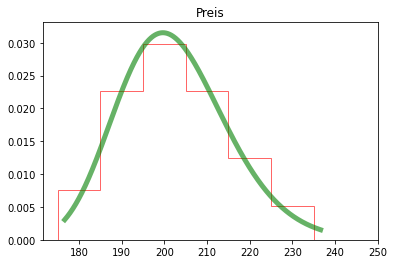

In [15]:
ticks=[180,190,200,210,220,230,240,250]
fig, ax = plt.subplots(1, 1)
plt.title("Preis")
x = np.linspace(preis_distr.ppf(0.01),
                preis_distr.ppf(0.99), N)
ax.hist(sampl_dat, density=True, alpha=0.6,color='red',bins=ticks, histtype='step',align="left" )
ax.plot(x, preis_distr.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf',color="green")
ax.set_xticks(ticks)


# Menge

In [16]:
menge=np.array([2325,2350,2375,2400,2425,2450,2475])
prob_menge=np.array([0.05,0.125,0.225,0.25,0.225,0.1,0.025])

In [17]:
custm = stats.rv_discrete(name='custm', values=(menge, prob_menge))

In [18]:
sampl_dat=custm.rvs(size=N)

In [19]:
mle=[]
for i in distr_list:
    dist = getattr(scipy.stats, i) # Rücknahme Name des Vertriebs
    arg = dist.fit(sampl_dat) # Berechnung der Verteilungsargumente bei Verwendung einer diskreten Verteilung
    new_distr=dist(*arg) # Erstellen einer Verteilungsklasse 
    data_synthetic = new_distr.rvs(size=N) # Stichproben aus einer Verteilung   
    mle.append(dist.nnlf(arg, sampl_dat)) # Berechnung der Werte der Log-Likelihood-Funktion
sse_df=pd.DataFrame({"Distribution": distr_list,
                    "MLE": mle,}) # Erstellen einer Tabelle mit Verteilungen und entsprechenden Werten der Log-Likelihood-Funktion  

In [20]:
sse_df.sort_values(by=['MLE'],ascending=True)

,Distribution,MLE
6,beta,745461.539086
9,pearson3,747774.583802
7,loggamma,747784.223637
8,exponnorm,747827.195261
0,norm,747827.195290
3,t,747827.289963
12,betaprime,747895.364614
4,gamma,747896.271179
10,alpha,747941.251484
13,chi,748073.078191


In [21]:
dist = distfit(stats='RSS',distr=distr_list)   

In [22]:
dist.fit_transform(sampl_dat) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.0188969] [loc=2397.094 scale=35.395]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.0199038] [loc=2325.000 scale=72.094]
[distfit] >[pareto   ] [3.22 sec] [RSS: 0.0199376] [loc=-0.960 scale=2325.960]
[distfit] >[t        ] [1.67 sec] [RSS: 0.0188969] [loc=2397.094 scale=35.395]
[distfit] >[gamma    ] [2.03 sec] [RSS: 0.0189002] [loc=782.873 scale=0.777]
[distfit] >[lognorm  ] [5.95 sec] [RSS: 0.0218552] [loc=2325.000 scale=5.730]
[distfit] >[beta     ] [1.48 sec] [RSS: 0.018876] [loc=2307.064 scale=181.927]
[distfit] >[loggamma ] [2.13 sec] [RSS: 0.0188922] [loc=-360.165 scale=514.925]
[distfit] >[exponnorm] [1.96 sec] [RSS: 0.0188969] [loc=2397.067 scale=35.395]
[distfit] >[pearson3 ] [5.48 sec] [RSS: 0.0188911] [loc=2397.094 scale=35.403]
[distfit] >[alpha    ] [3.15 sec] [RSS: 0.0189014] [loc=-998.016 scale=324956.212]
[distfit] >[burr     ] [15.5 sec] [RSS: 0.01904] [loc=-228.072 scale=2248.695]
[distfit] 

{'model': {'distr': <scipy.stats._continuous_distns.beta_gen at 0x26d2925ba90>,
  'stats': 'RSS',
  'params': (2.710977583976719,
   2.7748830268882587,
   2307.0642859930413,
   181.92657046478936),
  'name': 'beta',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x26d2b659700>,
  'score': 0.018876013314799142,
  'loc': 2307.0642859930413,
  'scale': 181.92657046478936,
  'arg': (2.710977583976719, 2.7748830268882587),
  'CII_min_alpha': 2338.5483316617433,
  'CII_max_alpha': 2455.860553288042},
 'summary':         distr     score  LLE          loc          scale  \
 0        beta  0.018876  NaN  2307.064286      181.92657   
 1    pearson3  0.018891  NaN  2397.093675      35.403474   
 2    loggamma  0.018892  NaN  -360.165094      514.92531   
 3   exponnorm  0.018897  NaN  2397.067167      35.395304   
 4        norm  0.018897  NaN  2397.093667      35.395196   
 5           t  0.018897  NaN  2397.093576      35.394928   
 6       gamma    0.0189  NaN   782.873394      

In [23]:
dist_param=stats.beta.fit(sampl_dat)

Initialisierung einer Verteilungsklasse mit hinteren Parametern

In [24]:
menge_distr=stats.beta(*dist_param)

In [25]:
data_synthetic = menge_distr.rvs( size=N)    

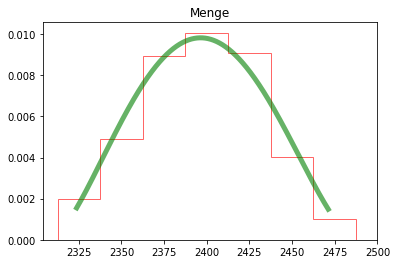

In [26]:
ticks=[2325,2350,2375,2400,2425,2450,2475,2500]
fig, ax = plt.subplots(1, 1)
plt.title("Menge")
x = np.linspace(menge_distr.ppf(0.01),
                menge_distr.ppf(0.99), N)
ax.hist(sampl_dat, density=True, alpha=0.6,color='red',bins=ticks, histtype='step',align="left" )
ax.plot(x, menge_distr.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf',color="green")
ax.set_xticks(ticks)

# Variable Costs

In [27]:
var_costs=np.array([80,90,100,110,120])
prob_var_costs=np.array([0.1,0.225,0.4,0.175,0.1])

In [28]:
custm = stats.rv_discrete(name='custm', values=(var_costs, prob_var_costs))

In [29]:
sampl_dat=custm.rvs(size=N)

In [30]:
mle=[]
for i in distr_list:
    dist = getattr(scipy.stats, i) # Rücknahme Name des Vertriebs
    arg = dist.fit(sampl_dat) # Berechnung der Verteilungsargumente bei Verwendung einer diskreten Verteilung
    new_distr=dist(*arg) # Erstellen einer Verteilungsklasse 
    data_synthetic = new_distr.rvs(size=N) # Stichproben aus einer Verteilung   
    mle.append(dist.nnlf(arg, sampl_dat)) # Berechnung der Werte der Log-Likelihood-Funktion
sse_df=pd.DataFrame({"Distribution": distr_list,
                    "MLE": mle,}) # Erstellen einer Tabelle mit Verteilungen und entsprechenden Werten der Log-Likelihood-Funktion     

In [31]:
sse_df.sort_values(by=['MLE'],ascending=True)

,Distribution,MLE
6,beta,439410.313028
14,chi2,500659.280920
5,lognorm,522177.725387
13,chi,571146.972851
9,pearson3,571385.537749
4,gamma,571392.270594
8,exponnorm,571575.487532
0,norm,571583.569244
3,t,571584.652327
7,loggamma,571697.397219


In [32]:
dist = distfit(stats='RSS',distr=distr_list)   

In [33]:
dist.fit_transform(sampl_dat) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 0.376191] [loc=99.489 scale=10.931]
[distfit] >[expon    ] [0.00 sec] [RSS: 0.385621] [loc=80.000 scale=19.489]
[distfit] >[pareto   ] [3.52 sec] [RSS: 0.388279] [loc=-0.307 scale=80.307]
[distfit] >[t        ] [2.19 sec] [RSS: 0.376191] [loc=99.489 scale=10.931]
[distfit] >[gamma    ] [2.06 sec] [RSS: 0.376249] [loc=-69.972 scale=0.705]
[distfit] >[lognorm  ] [6.12 sec] [RSS: 0.390178] [loc=80.000 scale=7.246]
[distfit] >[beta     ] [4.69 sec] [RSS: 0.376466] [loc=79.994 scale=40.006]
[distfit] >[loggamma ] [2.05 sec] [RSS: 0.376176] [loc=-1796.815 scale=289.890]
[distfit] >[exponnorm] [1.36 sec] [RSS: 0.376191] [loc=97.470 scale=10.743]
[distfit] >[pearson3 ] [2.56 sec] [RSS: 0.376271] [loc=99.489 scale=10.939]
[distfit] >[alpha    ] [3.24 sec] [RSS: 0.376487] [loc=-98.279 scale=3547.885]
[distfit] >[burr     ] [16.0 sec] [RSS: 0.37602] [loc=-0.472 scale=101.128]
[distfit] >[betaprime] [4.16 sec] [RSS: 0.

{'model': {'distr': <scipy.stats._continuous_distns.burr_gen at 0x26d29254640>,
  'stats': 'RSS',
  'params': (16.82101986654162,
   0.8468092654482916,
   -0.47235986546799535,
   101.12789403487186),
  'name': 'burr',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x26d2bb76f40>,
  'score': 0.37601988556960925,
  'loc': -0.47235986546799535,
  'scale': 101.12789403487186,
  'arg': (16.82101986654162, 0.8468092654482916),
  'CII_min_alpha': 81.61860698203363,
  'CII_max_alpha': 118.78305963565825},
 'summary':         distr     score  LLE          loc        scale  \
 0        burr   0.37602  NaN     -0.47236   101.127894   
 1    loggamma  0.376176  NaN -1796.815184   289.889918   
 2           t  0.376191  NaN    99.488614    10.930664   
 3        norm  0.376191  NaN    99.488667    10.931173   
 4   exponnorm  0.376191  NaN    97.469545    10.743315   
 5       gamma  0.376249  NaN   -69.972207     0.705022   
 6    pearson3  0.376271  NaN    99.488623    10.939458   


In [34]:
dist_param=stats.burr.fit(sampl_dat)

In [35]:
var_costs_distr=stats.burr(*dist_param)

In [36]:
data_synthetic = var_costs_distr.rvs( size=N)    

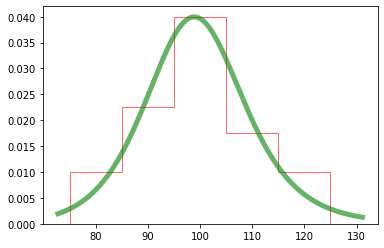

In [37]:
ticks=[80,90,100,110,120,130]
fig, ax = plt.subplots(1, 1)
x = np.linspace(var_costs_distr.ppf(0.01),
                var_costs_distr.ppf(0.99), N)
ax.hist(sampl_dat, density=True, alpha=0.6,color='red',bins=ticks, histtype='step',align="left" )
ax.plot(x, var_costs_distr.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf',color="green")
ax.set_xticks(ticks)

# Fix Costs

In [38]:
fix_costs=np.array([50000,55000,60000,65000,70000])
prob_fix_costs=np.array([0.1,0.275,0.3,0.175,0.15])

In [39]:
custm = stats.rv_discrete(name='custm', values=(fix_costs, prob_fix_costs))

In [40]:
sampl_dat=custm.rvs(size=N)

In [41]:
mle=[]
for i in distr_list:
    dist = getattr(scipy.stats, i) # Rücknahme Name des Vertriebs
    arg = dist.fit(sampl_dat) # Berechnung der Verteilungsargumente bei Verwendung einer diskreten Verteilung
    new_distr=dist(*arg) # Erstellen einer Verteilungsklasse 
    data_synthetic = new_distr.rvs(size=N) # Stichproben aus einer Verteilung   
    mle.append(dist.nnlf(arg, sampl_dat)) # Berechnung der Werte der Log-Likelihood-Funktion
sse_df=pd.DataFrame({"Distribution": distr_list,
                    "MLE": mle,}) # Erstellen einer Tabelle mit Verteilungen und entsprechenden Werten der Log-Likelihood-Funktion     

In [42]:
sse_df.sort_values(by=['MLE'],ascending=True)

,Distribution,MLE
6,beta,1.283507e+06
9,pearson3,1.517172e+06
4,gamma,1.517198e+06
12,betaprime,1.517499e+06
10,alpha,1.517661e+06
8,exponnorm,1.518215e+06
0,norm,1.518229e+06
3,t,1.518229e+06
7,loggamma,1.518381e+06
11,burr,1.524391e+06


In [43]:
dist = distfit(stats='RSS',distr=distr_list)   

In [44]:
dist.fit_transform(sampl_dat) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm     ] [0.00 sec] [RSS: 1.32011e-06] [loc=60006.800 scale=6018.468]
[distfit] >[expon    ] [0.00 sec] [RSS: 1.33873e-06] [loc=50000.000 scale=10006.800]
[distfit] >[pareto   ] [2.81 sec] [RSS: 1.34668e-06] [loc=-171.612 scale=50171.612]
[distfit] >[t        ] [2.60 sec] [RSS: 1.32011e-06] [loc=60006.588 scale=6018.361]
[distfit] >[gamma    ] [2.19 sec] [RSS: 1.31905e-06] [loc=29339.632 scale=1186.540]
[distfit] >[lognorm  ] [5.90 sec] [RSS: 1.36642e-06] [loc=50000.000 scale=0.813]
[distfit] >[beta     ] [4.40 sec] [RSS: 1.29454e-06] [loc=46626.287 scale=23373.713]
[distfit] >[loggamma ] [1.98 sec] [RSS: 1.3199e-06] [loc=-1338848.918 scale=200196.766]
[distfit] >[exponnorm] [2.07 sec] [RSS: 1.32007e-06] [loc=58847.646 scale=5906.047]
[distfit] >[pearson3 ] [3.39 sec] [RSS: 1.31885e-06] [loc=60006.800 scale=6083.297]
[distfit] >[alpha    ] [3.03 sec] [RSS: 1.31918e-06] [loc=-23119.001 scale=1147613.300]
[distfit] >[burr     ] [15.1 

{'model': {'distr': <scipy.stats._continuous_distns.beta_gen at 0x26d2925ba90>,
  'stats': 'RSS',
  'params': (1.3219294491298812,
   0.6992864965690413,
   46626.28682830555,
   23373.713171694453),
  'name': 'beta',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x26d2e30c760>,
  'score': 1.2945435908258573e-06,
  'loc': 46626.28682830555,
  'scale': 23373.713171694453,
  'arg': (1.3219294491298812, 0.6992864965690413),
  'CII_min_alpha': 49894.05436078822,
  'CII_max_alpha': 69763.14632973533},
 'summary':         distr     score  LLE             loc           scale  \
 0        beta  0.000001  NaN    46626.286828    23373.713172   
 1    pearson3  0.000001  NaN    60006.800454     6083.296548   
 2       gamma  0.000001  NaN     29339.63198      1186.53991   
 3   betaprime  0.000001  NaN       -9.148375     1925.176387   
 4       alpha  0.000001  NaN   -23119.001142  1147613.300498   
 5    loggamma  0.000001  NaN -1338848.917683   200196.766287   
 6   exponnorm  0.0

In [45]:
dist_param=stats.pearson3.fit(sampl_dat)

In [46]:
fix_costs_distr=stats.pearson3(*dist_param)

In [47]:

data_synthetic=fix_costs_distr.rvs( size=N)    

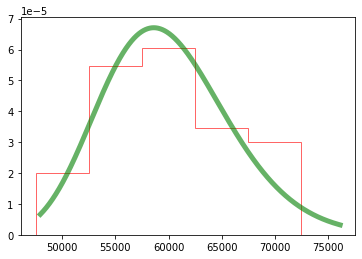

In [48]:
ticks=[50000,55000,60000,65000,70000,75000]
fig, ax = plt.subplots(1, 1)
x = np.linspace(fix_costs_distr.ppf(0.01),
                fix_costs_distr.ppf(0.99), N)
ax.hist(sampl_dat, density=True, alpha=0.6,color='red',bins=ticks, histtype='step',align="left" )
ax.plot(x, fix_costs_distr.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf',color="green")
ax.set_xticks(ticks)